In [1]:
%matplotlib widget
%matplotlib inline
from plot_fns import TMSPlotter
from model_fns import UncorrelatedTMS, CorrelatedTMS, AntiCorrelatedTMS, ComposedFeatureTMS, ToyModelConfig
from autoencoder_fns import AutoEncoder, AutoEncoderConfig

import pathlib
import torch as t
from tqdm.notebook import tqdm
device = t.device('cuda' if t.cuda.is_available() else 'cpu')
rootdir=pathlib.Path("./saved_models/")
rootdir.mkdir(exist_ok=True)

# Uncorrelated Model (2 hidden dims)

## Model

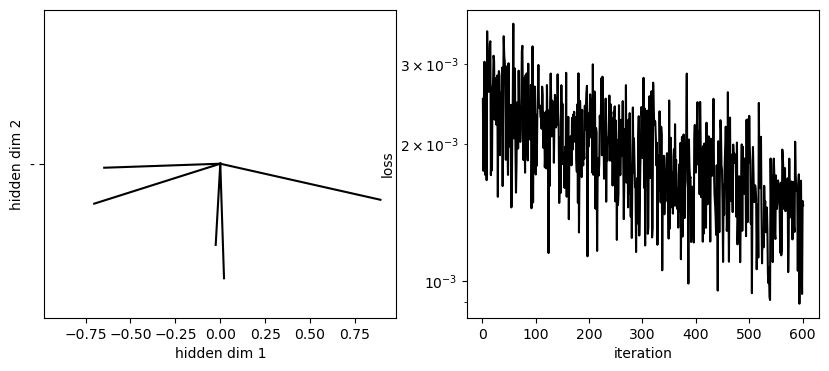

  0%|          | 0/5000 [00:00<?, ?it/s]

KeyboardInterrupt: 

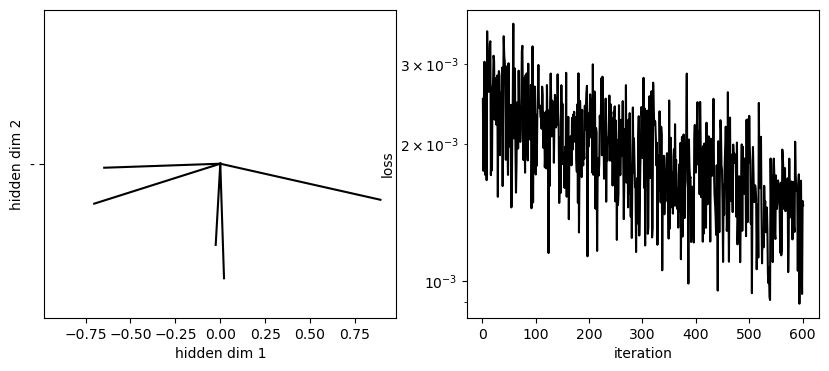

In [24]:
Sparsity = 0.99
cfg = ToyModelConfig(
                    input_size=5, 
                    hidden_size=2, 
                    batches=5000, 
                    batch_size=1000,
                    sparsity = lambda N: Sparsity
                    )

model = UncorrelatedTMS(cfg).to(device)
model.train()

## SAE

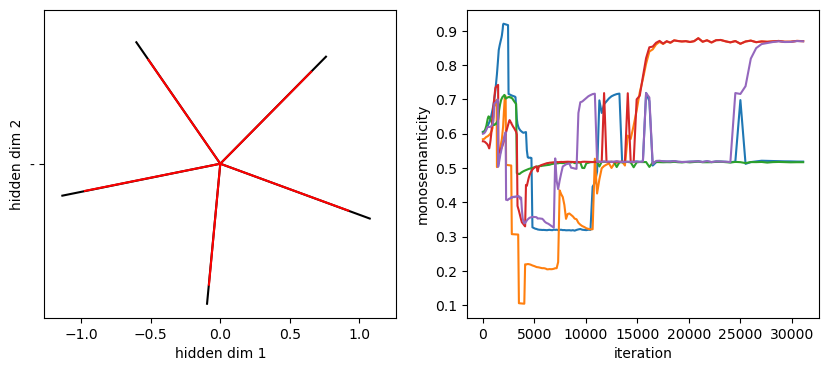

In [ ]:
#This worked pretty well but not perfectly for l1_coeff = 0.25. normalize_in_l2 is faulty here because lots of activations are 0.
lr=1e-3
l1_coeff = 0.25

saes = []
#can add a loop here and append
proj_name = f"autoencoder-uncorrelated"
en_cfg = AutoEncoderConfig(d_in=cfg.hidden_size,
                           n_inst=5,
                           training_samples = 32_000_000,
                            dict_mult=cfg.input_size/cfg.hidden_size,
                            lr=lr,
                            adam_beta1=0,
                            wandb_project=proj_name,
                            l1_coeff=l1_coeff,
                            pre_encoder_bias=False,
                           normalize_in_l2=False
                           )
print('running {}'.format(en_cfg.run_name))
encoder = AutoEncoder(en_cfg).to(device)
encoder.train(model,rootdir=rootdir)# plotter=plotter)
saes.append(encoder)

# Correlated model (2 hidden dims)

## Model

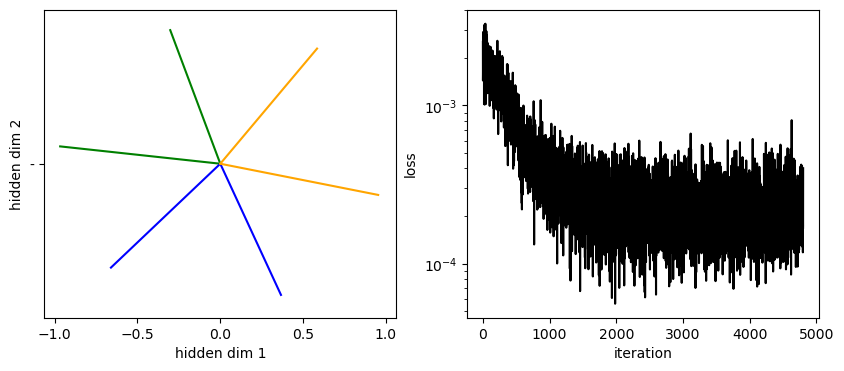

In [ ]:
Sval = 0.99
cfg = ToyModelConfig(
                    feat_sets=[2]*3,
                    hidden_size=2,
                    batches=5000,
                    batch_size=1000,
                    sparsity = lambda N: Sval
                    )

model = CorrelatedTMS(cfg).to(device)
model.train()

## SAE

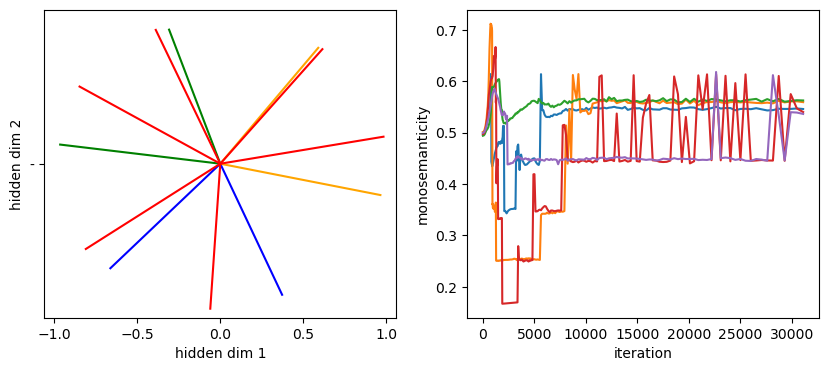

In [ ]:
#Doesn't work! And makes sense.
lr=3e-3
l1_coeff = 0.25

saes = []
#can add a loop here and append
proj_name = f"autoencoder-correlated"
en_cfg = AutoEncoderConfig(d_in=cfg.hidden_size,
                           n_inst=5,
                           training_samples = 32_000_000,
                            dict_mult=cfg.input_size/cfg.hidden_size,
                            lr=lr,
                            adam_beta1=0,
                            wandb_project=proj_name,
                            l1_coeff=l1_coeff,
                            pre_encoder_bias=False,
                           normalize_in_l2=False,
                           ghost_grads_cooldown=100,
                           )
print('running {}'.format(en_cfg.run_name))
encoder = AutoEncoder(en_cfg).to(device)
encoder.train(model,rootdir=rootdir)# plotter=plotter)
saes.append(encoder)

# Composed Models (20 features, 2 sets)

## Antipodal features (10 hidden dims)

### Model

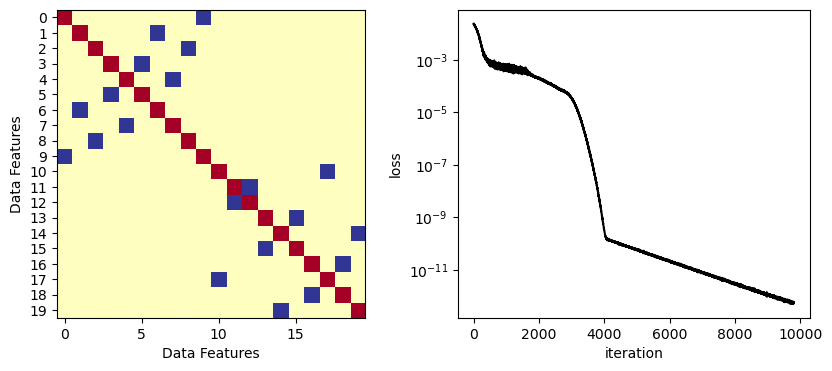

In [ ]:
cfg = ToyModelConfig(hidden_size=10,
                     feat_sets=(10,10),
                     batches=10000, 
                     batch_size=1000
                     )

model = ComposedFeatureTMS(cfg).to(device)
model.train()

### SAE

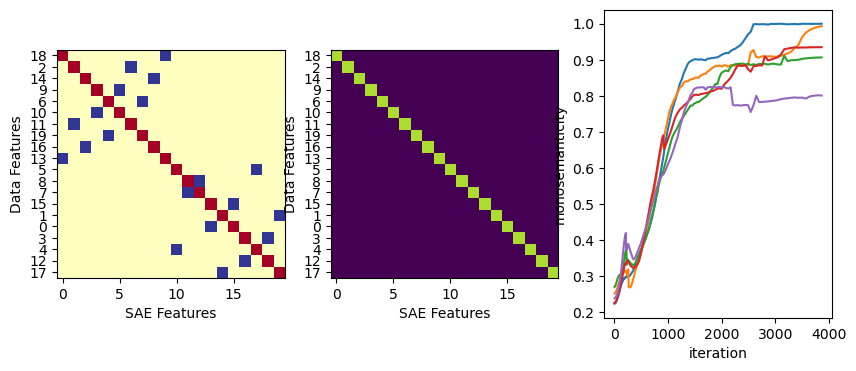

In [ ]:
lr=3e-3
l1_coeff = 0.25

saes = []
#can add a loop here and append
proj_name = f"autoencoder-uncorrelated"
en_cfg = AutoEncoderConfig(d_in=cfg.hidden_size,
                           n_inst=5,
                           training_samples = 4_000_000,
                            dict_mult=cfg.input_size/cfg.hidden_size,
                            lr=lr,
                            adam_beta1=0,
                            wandb_project=proj_name,
                            l1_coeff=l1_coeff,
                            pre_encoder_bias=False
                           )
print('running {}'.format(en_cfg.run_name))
encoder = AutoEncoder(en_cfg).to(device)
encoder.train(model,rootdir=rootdir)# plotter=plotter)
saes.append(encoder)

## 9 hidden dims

### Model

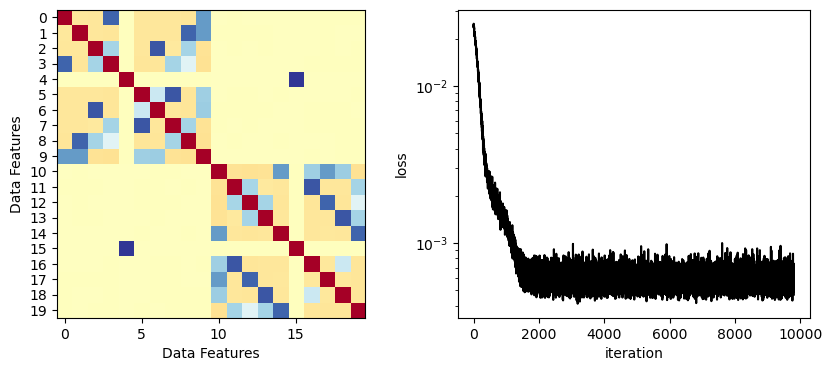

In [ ]:
cfg = ToyModelConfig(hidden_size=9,
                     feat_sets=(10,10),
                     batches=10000, 
                     batch_size=1000
                     )

model = ComposedFeatureTMS(cfg).to(device)
model.train()

### SAE

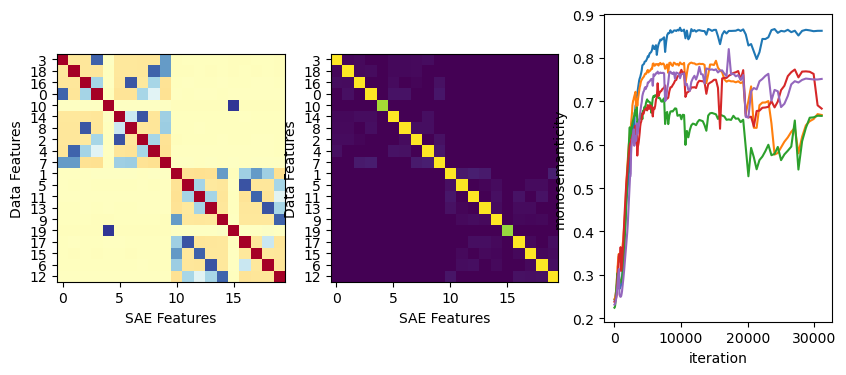

In [ ]:
lr=3e-3
l1_coeff = 0.3

#can add a loop here and append
proj_name = f"autoencoder-uncorrelated"
en_cfg = AutoEncoderConfig(d_in=cfg.hidden_size,
                           n_inst=5,
                           training_samples = 32_000_000,
                            dict_mult=cfg.input_size/cfg.hidden_size,
                            lr=lr,
                            adam_beta1=0.9, #setting this to 0 doesn't seem to help.
                            wandb_project=proj_name,
                            l1_coeff=l1_coeff,
                            pre_encoder_bias=False,
                            ghost_grads_cooldown = 0
                           )
print('running {}'.format(en_cfg.run_name))
encoder = AutoEncoder(en_cfg).to(device)
encoder.train(model,rootdir=rootdir)# plotter=plotter)
saes.append(encoder)

## 8 hidden dims

### Model

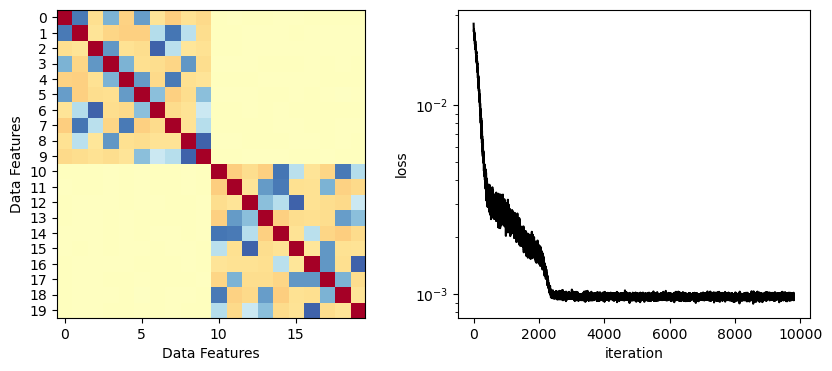

In [26]:
cfg = ToyModelConfig(hidden_size=8,
                     feat_sets=(10,10),
                     batches=10000, 
                     batch_size=1000
                     )

model = ComposedFeatureTMS(cfg).to(device)
model.train()

### SAE

{'step': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  53,
  55,
  57,
  59,
  61,
  63,
  65,
  67,
  69,
  71,
  73,
  75,
  77,
  79,
  81,
  83,
  85,
  87,
  89,
  91,
  93,
  95,
  97,
  99,
  101,
  104,
  107,
  110,
  113,
  116,
  119,
  122,
  125,
  128,
  131,
  134,
  137,
  140,
  143,
  146,
  149,
  152,
  156,
  160,
  164,
  168,
  172,
  176,
  180,
  184,
  188,
  192,
  196,
  200,
  204,
  209,
  214,
  219,
  224,
  229,
  234,
  239,
  244,
  249,
  254,
  260,
  266,
  272,
  278,
  284,
  290,
  296,
  302,
  309,
  316,
  323,
  330,
  337,
  344,
  351,
  359,
  367,
  375,
  383,
  391,
  399,
  407,
  416,
  425,
  434,
  443,
  452,
  462,
  472,
  482,
  492,
  502,
  513,
  524,
  535,
  546,
  557,
  569

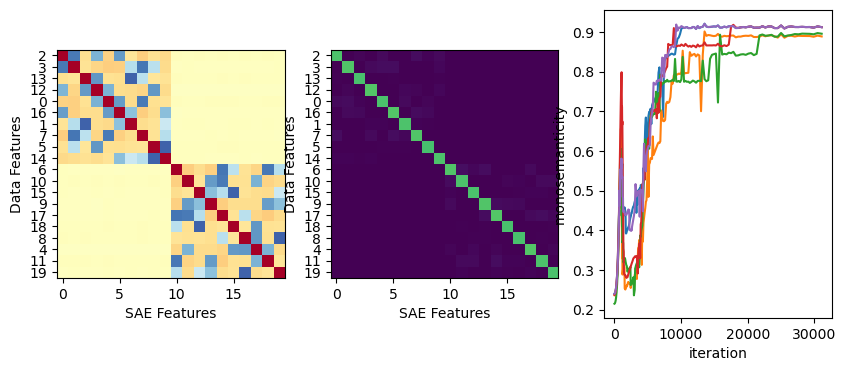

In [28]:
lr=1e-3
l1_coeff = 0.75 #0.75 works pretty well?

cd = 100 #seems pretty good, tried [0, 1, 3, 10, 30, 100, 300, 1000]

#can add a loop here and append
proj_name = f"autoencoder-uncorrelated"
en_cfg = AutoEncoderConfig(d_in=cfg.hidden_size,
                        n_inst=5,
                        training_samples = 32_000_000,
                            dict_mult=cfg.input_size/cfg.hidden_size,
                            lr=lr,
                            adam_beta1=0.9, #setting this to 0 doesn't seem to help.
                            wandb_project=proj_name,
                            l1_coeff=l1_coeff,
                            pre_encoder_bias=False,
                            ghost_grads_cooldown = cd
                        )
print('running {}'.format(en_cfg.run_name))
encoder = AutoEncoder(en_cfg).to(device)
encoder.train(model,rootdir=rootdir)# plotter=plotter)
# saes.append(encoder)

## 7 hidden dims

### Model

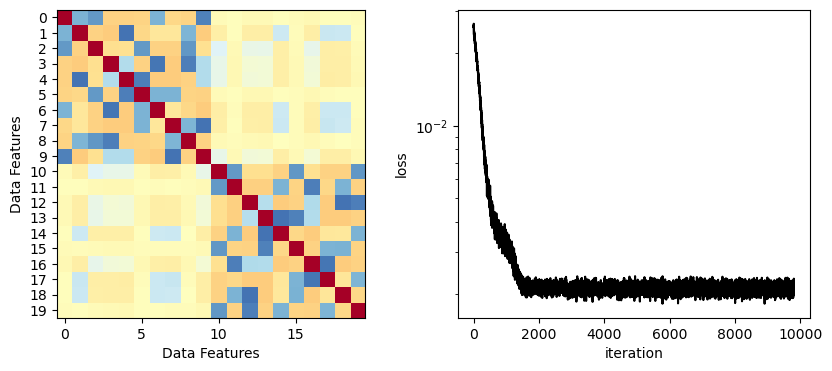

In [2]:
cfg = ToyModelConfig(hidden_size=7,
                     feat_sets=(10,10),
                     batches=10000, 
                     batch_size=1000
                     )

model = ComposedFeatureTMS(cfg).to(device)
model.train()

### SAE

NameError: name 'saes' is not defined

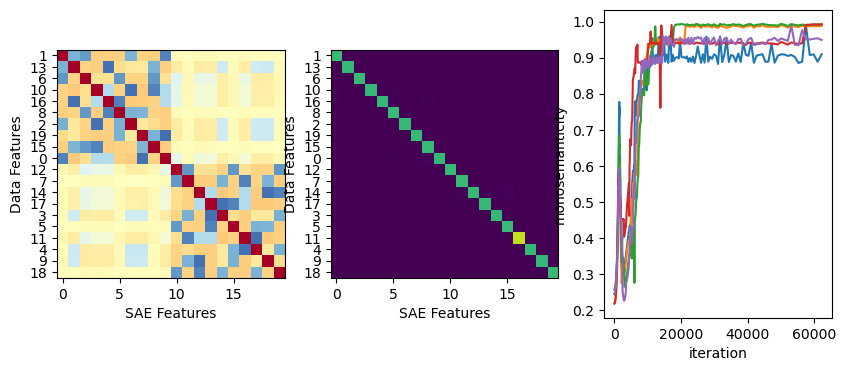

In [7]:
lr=1e-3
l1_coeff = 0.8

#can add a loop here and append
proj_name = f"autoencoder-uncorrelated"
en_cfg = AutoEncoderConfig(d_in=cfg.hidden_size,
                           n_inst=5,
                           training_samples = 64_000_000,
                            dict_mult=cfg.input_size/cfg.hidden_size,
                            lr=lr,
                            adam_beta1=0.9, #setting this to 0 doesn't seem to help.
                            wandb_project=proj_name,
                            l1_coeff=l1_coeff,
                            pre_encoder_bias=False,
                            ghost_grads_cooldown = 100,
                            ghost_revivals = True,
                            ghost_revival_count = 3
                           )
print('running {}'.format(en_cfg.run_name))
encoder = AutoEncoder(en_cfg).to(device)
encoder.train(model,rootdir=rootdir)# plotter=plotter)
saes.append(encoder)

## 6 hidden dims

### Model

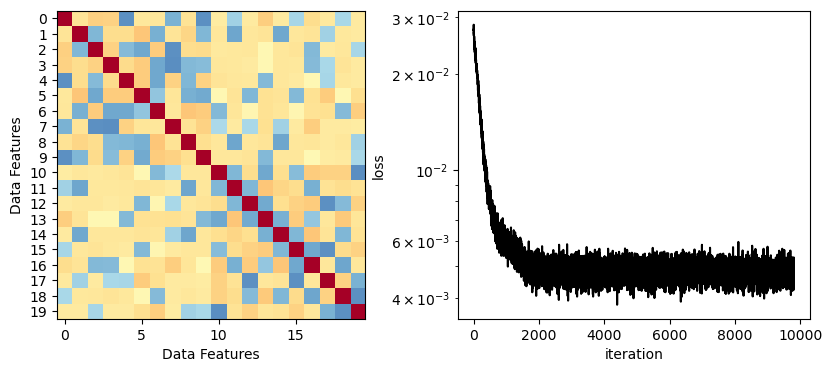

In [8]:
cfg = ToyModelConfig(hidden_size=6,
                     feat_sets=(10,10),
                     batches=10000, 
                     batch_size=1000
                     )

model = ComposedFeatureTMS(cfg).to(device)
model.train()

### SAE

NameError: name 'saes' is not defined

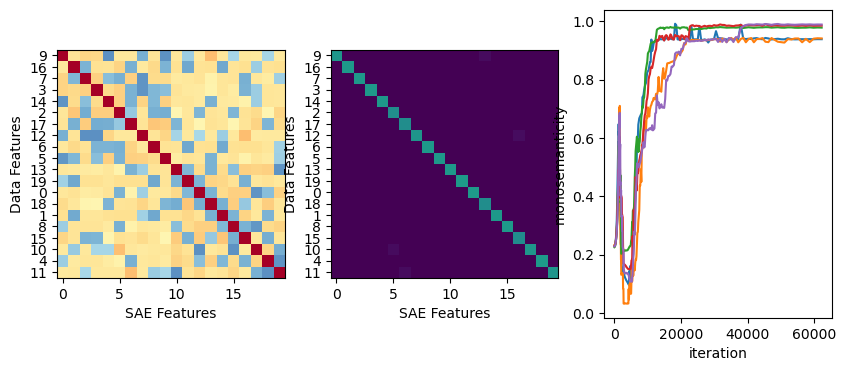

In [14]:
lr=1e-3
l1_coeff = 0.9

#can add a loop here and append
proj_name = f"autoencoder-uncorrelated"
en_cfg = AutoEncoderConfig(d_in=cfg.hidden_size,
                           n_inst=5,
                           training_samples = 64_000_000,
                            dict_mult=cfg.input_size/cfg.hidden_size,
                            lr=lr,
                            adam_beta1=0, #Unclear if setting to 0 or 0.9 is best. Maybe try intermediate values too
                            wandb_project=proj_name,
                            l1_coeff=l1_coeff,
                            pre_encoder_bias=False,
                            ghost_grads_cooldown = 100,
                            ghost_revivals = True,
                            ghost_revival_count = 3
                           )
print('running {}'.format(en_cfg.run_name))
encoder = AutoEncoder(en_cfg).to(device)
encoder.train(model,rootdir=rootdir)# plotter=plotter)
saes.append(encoder)

## 5 hidden dims
Superposition gets really messy here! Autoencoder training becomes much harder. Need to think on this...

### Model

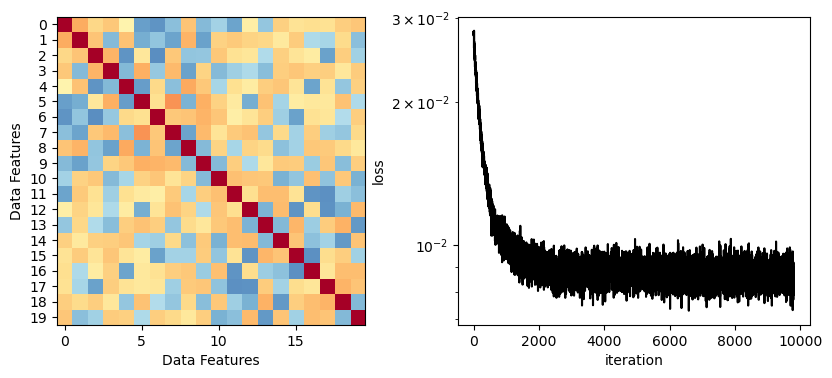

In [15]:
cfg = ToyModelConfig(hidden_size=5,
                     feat_sets=(10,10),
                     batches=10000, 
                     batch_size=1000
                     )

model = ComposedFeatureTMS(cfg).to(device)
model.train()

### SAE

running ninst5_din5_dsae20-L1-1-LR-0.001-Seed-2108845265
Reinitializing b_dec with geometric median of activations
Previous distances: 0.9016047716140747
New distances: 0.9007008671760559
Reinitializing b_dec with geometric median of activations
Previous distances: 0.9016047716140747
New distances: 0.9007008671760559
Reinitializing b_dec with geometric median of activations
Previous distances: 0.9016047716140747
New distances: 0.9007008671760559
Reinitializing b_dec with geometric median of activations
Previous distances: 0.9016047716140747
New distances: 0.9007008671760559
Reinitializing b_dec with geometric median of activations
Previous distances: 0.9016047716140747
New distances: 0.9007008671760559


/Users/evananders/research/code/superposition-geometry-toys/autoencoder_fns.py:246: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = t.tensor(out, dtype=self.cfg.dtype)


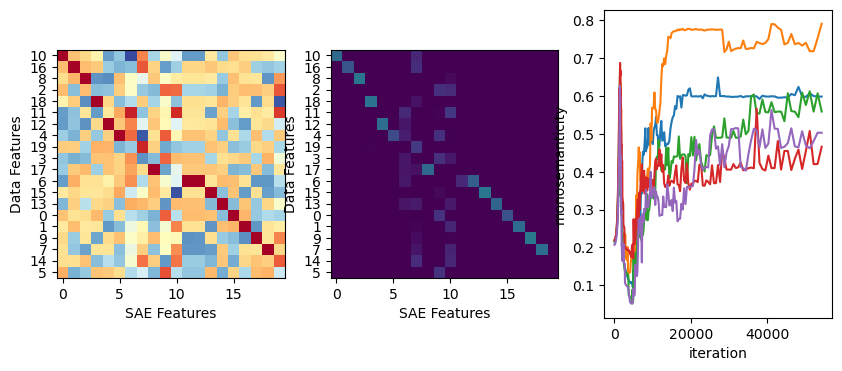

  0%|          | 0/62500 [00:00<?, ?it/s]

/Users/evananders/anaconda3/envs/ai/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:149: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


In [29]:
#seems like setting higher adam beta1 in this regime is helpful.
lr=1e-3
l1_coeff = 1
cd = 100

#can add a loop here and append
proj_name = f"autoencoder-uncorrelated"
en_cfg = AutoEncoderConfig(d_in=cfg.hidden_size,
                        n_inst=5,
                        training_samples = 64_000_000,
                            dict_mult=cfg.input_size/cfg.hidden_size,
                            lr=lr,
                            adam_beta1=0.9,
                            wandb_project=proj_name,
                            l1_coeff=l1_coeff,
                            pre_encoder_bias=False,
                            ghost_grads_cooldown = cd,
                            ghost_revivals = True,
                            ghost_revival_count = 3
                        )
print('running {}'.format(en_cfg.run_name))
encoder = AutoEncoder(en_cfg).to(device)
encoder.train(model,rootdir=rootdir)# plotter=plotter)
saes.append(encoder)